**Task:**

Start date: 01.01.2018
End date: 30.09.2019

For this period data was uploaded from Google Analytics.

- Сompare traffic data to real sales data.
- Is there any correlation?
- What seasonality of drugs can there be? Can it be seen in sales data or in traffic?
- Is it possible to predict sales or traffic for 2020 based on 2-year data?

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_csv('dataset4.csv', index_col=0)
df=df.astype('float32')

In [3]:
sales =pd.read_excel('sells.xlsx', sep = ';', index_col=None) 
sales.head()

,Контрагент,Unnamed: 1,Unnamed: 2,янв. 2018,февр. 2018,март 2018,апр. 2018,май 2018,июнь 2018,июль 2018,...,янв. 2019,февр. 2019,март 2019,апр. 2019,май 2019,июнь 2019,июль 2019,авг. 2019,сент. 2019,Итого
0,Номенклатура,NaN,NaN,Количество,Количество,Количество,Количество,Количество,Количество,Количество,...,Количество,Количество,Количество,Количество,Количество,Количество,Количество,Количество,Количество,Количество
1,ЕАПТЕКА,NaN,NaN,10648,10725,11437,10358,9535,7551,7613,...,10808,10732,10722,9259,6708,6281,6759,6928,8326,196202
2,Аир корневища 75г,NaN,NaN,45,65,51,32,37,24,59,...,31,36,28,40,31,29,18,30,25,763
3,Алтей корни 75г,NaN,NaN,13,19,23,19,17,12,22,...,12,16,8,13,12,6,12,7,15,321
4,Багульник болотный побеги 50г,NaN,NaN,17,26,34,22,18,9,12,...,22,24,18,12,7,4,6,14,19,383


In [4]:
del sales['Unnamed: 1']
del sales['Unnamed: 2']
del sales['Итого']

In [5]:
sales.loc[103,:].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [6]:
sales = sales.drop(index=0)
sales = sales.drop(index=103)

In [7]:
sales = sales.transpose()
sales

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
Контрагент,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,Девясил корневища и корни 50г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
янв. 2018,10648,45,13,17,62,88,67,85,89,54,...,49,107,55,633,133,106,228,NaN,80,52
февр. 2018,10725,65,19,26,104,128,107,63,80,33,...,70,146,68,538,141,96,219,NaN,79,66
март 2018,11437,51,23,34,99,122,76,65,104,36,...,107,154,44,512,130,111,190,NaN,80,59
апр. 2018,10358,32,19,22,68,74,76,76,62,28,...,69,101,42,515,104,102,160,NaN,53,48
май 2018,9535,37,17,18,53,68,48,55,89,32,...,61,75,38,1390,110,88,144,NaN,55,54
июнь 2018,7551,24,12,9,43,48,60,49,95,42,...,49,75,24,796,65,35,133,5,41,28
июль 2018,7613,59,22,12,49,38,30,49,93,32,...,33,62,32,1031,130,51,119,15,50,64
авг. 2018,9043,28,28,14,82,56,46,113,72,31,...,49,72,44,1713,98,44,103,31,52,34
сент. 2018,9519,33,11,15,44,83,77,44,94,35,...,89,101,34,1327,136,44,131,30,55,37


In [8]:
# Set as a header.
sales.columns = sales.loc['Контрагент']
sales = sales.drop(index = 'Контрагент')
sales

Контрагент,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,Девясил корневища и корни 50г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
янв. 2018,10648,45,13,17,62,88,67,85,89,54,...,49,107,55,633,133,106,228,NaN,80,52
февр. 2018,10725,65,19,26,104,128,107,63,80,33,...,70,146,68,538,141,96,219,NaN,79,66
март 2018,11437,51,23,34,99,122,76,65,104,36,...,107,154,44,512,130,111,190,NaN,80,59
апр. 2018,10358,32,19,22,68,74,76,76,62,28,...,69,101,42,515,104,102,160,NaN,53,48
май 2018,9535,37,17,18,53,68,48,55,89,32,...,61,75,38,1390,110,88,144,NaN,55,54
июнь 2018,7551,24,12,9,43,48,60,49,95,42,...,49,75,24,796,65,35,133,5,41,28
июль 2018,7613,59,22,12,49,38,30,49,93,32,...,33,62,32,1031,130,51,119,15,50,64
авг. 2018,9043,28,28,14,82,56,46,113,72,31,...,49,72,44,1713,98,44,103,31,52,34
сент. 2018,9519,33,11,15,44,83,77,44,94,35,...,89,101,34,1327,136,44,131,30,55,37
окт. 2018,10881,38,22,12,68,72,71,65,92,64,...,89,122,78,627,136,58,166,46,100,41


In [9]:
import numpy as np
sales.insert(loc=0, column='Трафик', value=df.sessions.values)
sales=sales.fillna(0)
sales.head()

Контрагент,Трафик,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
янв. 2018,22758.0,10648,45,13,17,62,88,67,85,89,...,49,107,55,633,133,106,228,0,80,52
февр. 2018,24773.0,10725,65,19,26,104,128,107,63,80,...,70,146,68,538,141,96,219,0,79,66
март 2018,24530.0,11437,51,23,34,99,122,76,65,104,...,107,154,44,512,130,111,190,0,80,59
апр. 2018,21733.0,10358,32,19,22,68,74,76,76,62,...,69,101,42,515,104,102,160,0,53,48
май 2018,21862.0,9535,37,17,18,53,68,48,55,89,...,61,75,38,1390,110,88,144,0,55,54


Index - month and year. 1st column - traffic. 2nd column - sales. Other columns are drugs and the values are sales of each drug by month.

In [10]:
sales=sales.astype('float32')

In [11]:
idx = ['Январь 2018', 'Февраль 2018','Март 2018','Апрель 2018','Май 2018','Июнь 2018','Июль 2018','Август 2018',
 'Сентябрь 2018', 'Октябрь 2018', 'Ноябрь 2018', 'Декабрь 2018', 'Январь 2019', 'Февраль 2019','Март 2019',
 'Апрель 2019',
 'Май 2019',
 'Июнь 2019',
 'Июль 2019',
 'Август 2019',
 'Сентябрь 2019']

# df.index = idx

sales.index = idx

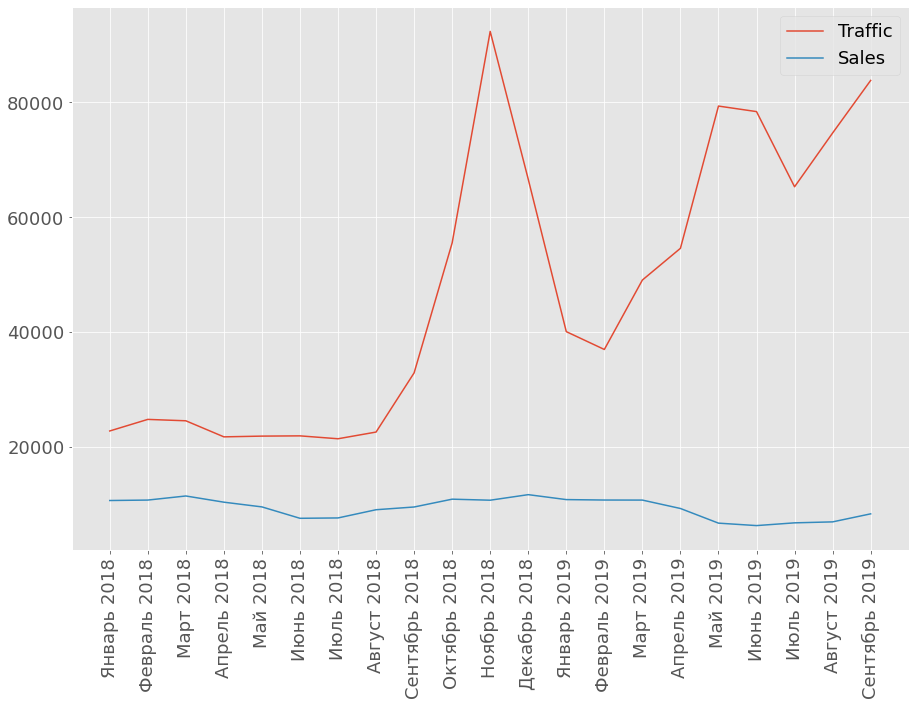

In [12]:
fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

plt.plot(sales['Трафик'],label = 'Traffic')
plt.plot(sales['ЕАПТЕКА'], label = 'Sales')
plt.legend(loc = 'best')

ax.set_xticks(np.arange(len(idx))) 

ax.set_xticklabels(idx)
plt.xticks(rotation=90)
plt.show()

Need to normilize data.

In [13]:
trafficsales = pd.DataFrame()
trafficsales['traffic'] = sales['Трафик'][:-1]
trafficsales['sales'] = sales['ЕАПТЕКА'][:-1]

In [14]:
trafficsales

,traffic,sales
Январь 2018,22758.0,10648.0
Февраль 2018,24773.0,10725.0
Март 2018,24530.0,11437.0
Апрель 2018,21733.0,10358.0
Май 2018,21862.0,9535.0
Июнь 2018,21905.0,7551.0
Июль 2018,21401.0,7613.0
Август 2018,22568.0,9043.0
Сентябрь 2018,32873.0,9519.0
Октябрь 2018,55507.0,10881.0


In [15]:
from sklearn import preprocessing

# norm = preprocessing.StandardScaler()
norm = preprocessing.MinMaxScaler()
norm.fit(trafficsales)

X = norm.transform(trafficsales)
X = pd.DataFrame(X, index=trafficsales.index, columns=trafficsales.columns)
X.head()

,traffic,sales
Январь 2018,0.019131,0.810655
Февраль 2018,0.047538,0.824949
Март 2018,0.044113,0.957119
Апрель 2018,0.004681,0.756822
Май 2018,0.006499,0.604047


In [16]:
X.corr()

,traffic,sales
traffic,1.000000,-0.301042
sales,-0.301042,1.000000


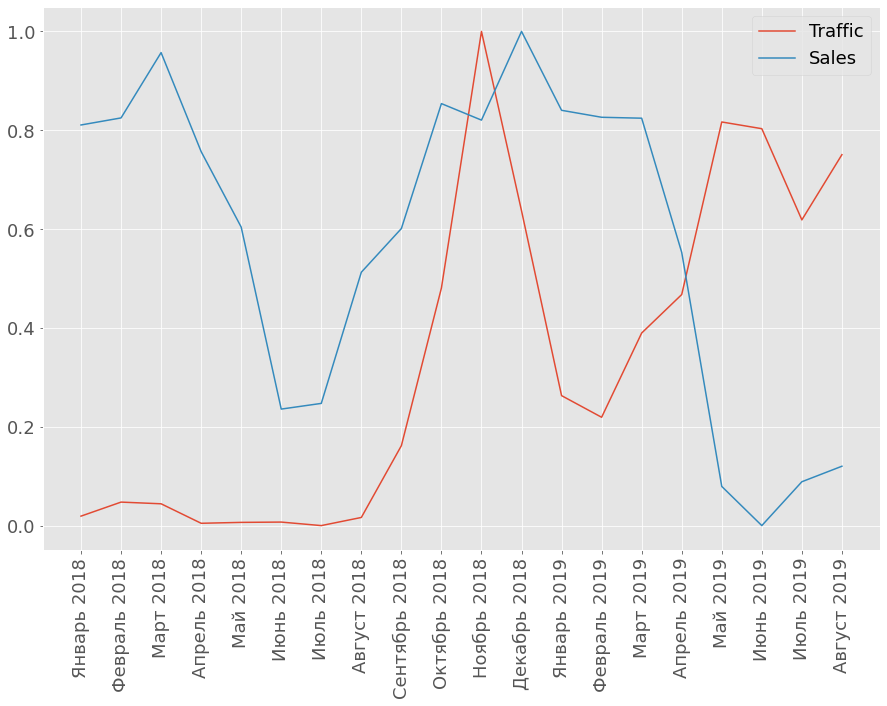

In [17]:
plt.figure(figsize=(15,10))
plt.plot(X.traffic, label='Traffic')
plt.plot(X.sales, label='Sales')
plt.legend(loc='best')

ax.set_xticks(np.arange(len(idx)))  

ax.set_xticklabels(idx)
plt.xticks(rotation=90)
plt.show()

In [18]:
df2 = sales.copy()

df2.insert(0, 'Месяц', df.month.values)
# y = np.append(df.year.values,np.nan)
df2.insert(1,'Год', df.year.values)

df2.head()

Контрагент,Месяц,Год,Трафик,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь 2018,1.0,2018.0,22758.0,10648.0,45.0,13.0,17.0,62.0,88.0,67.0,...,49.0,107.0,55.0,633.0,133.0,106.0,228.0,0.0,80.0,52.0
Февраль 2018,2.0,2018.0,24773.0,10725.0,65.0,19.0,26.0,104.0,128.0,107.0,...,70.0,146.0,68.0,538.0,141.0,96.0,219.0,0.0,79.0,66.0
Март 2018,3.0,2018.0,24530.0,11437.0,51.0,23.0,34.0,99.0,122.0,76.0,...,107.0,154.0,44.0,512.0,130.0,111.0,190.0,0.0,80.0,59.0
Апрель 2018,4.0,2018.0,21733.0,10358.0,32.0,19.0,22.0,68.0,74.0,76.0,...,69.0,101.0,42.0,515.0,104.0,102.0,160.0,0.0,53.0,48.0
Май 2018,5.0,2018.0,21862.0,9535.0,37.0,17.0,18.0,53.0,68.0,48.0,...,61.0,75.0,38.0,1390.0,110.0,88.0,144.0,0.0,55.0,54.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

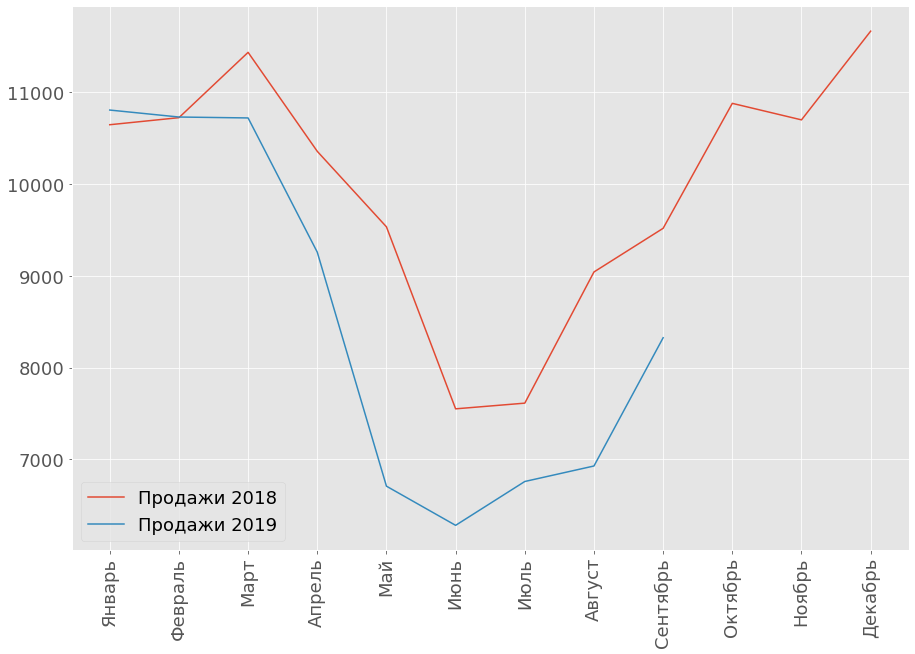

In [19]:
mnth=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# df2['Месяц'] = mnth
# make it a function

fig, ax = plt.subplots(figsize=(15,10))
df2.groupby('Год').get_group(2018)['ЕАПТЕКА'].plot(ax=ax,label='Продажи 2018')
df2.groupby('Год').get_group(2019)['ЕАПТЕКА'].plot(ax=ax,label='Продажи 2019')
plt.legend(loc='best')

ax.set_xticks(np.arange(len(mnth)))  # show them all! - чтобы были все, а не частично

ax.set_xticklabels(mnth)  # set to be the abbv (vs useless #)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

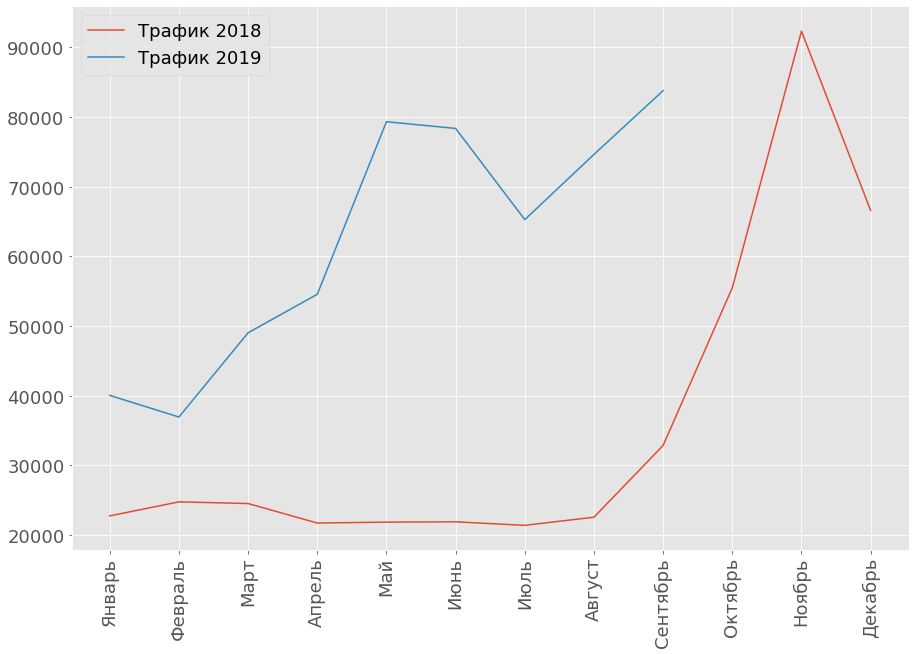

In [20]:
mnth=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# df2['Месяц'] = mnth


fig, ax = plt.subplots(figsize=(15,10))
df2.groupby('Год').get_group(2018)['Трафик'].plot(ax=ax,label='Трафик 2018')
df2.groupby('Год').get_group(2019)['Трафик'].plot(ax=ax,label='Трафик 2019')
plt.legend(loc='best')

ax.set_xticks(np.arange(len(mnth)))  # show them all! - чтобы были все, а не частично

ax.set_xticklabels(mnth)  # set to be the abbv (vs useless #)
plt.xticks(rotation=90)

In [21]:
sales2 = sales.copy() # just in case

# sales2.index = ['2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31','2018-06-30','2018-07-31','2018-08-31',
#               '2018-09-30','2018-10-31','2018-11-30','2018-12-31','2019-01-31','2019-02-28','2019-03-31','2019-04-30',
#                '2019-05-31','2019-06-30','2019-07-31','2019-08-31', '2019-09-30']

# sales2.index=pd.to_datetime(sales2.index)
# sales2.index = sales2.index.to_period('M')
sales2.index=idx

In [22]:
sales2

Контрагент,Трафик,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь 2018,22758.0,10648.0,45.0,13.0,17.0,62.0,88.0,67.0,85.0,89.0,...,49.0,107.0,55.0,633.0,133.0,106.0,228.0,0.0,80.0,52.0
Февраль 2018,24773.0,10725.0,65.0,19.0,26.0,104.0,128.0,107.0,63.0,80.0,...,70.0,146.0,68.0,538.0,141.0,96.0,219.0,0.0,79.0,66.0
Март 2018,24530.0,11437.0,51.0,23.0,34.0,99.0,122.0,76.0,65.0,104.0,...,107.0,154.0,44.0,512.0,130.0,111.0,190.0,0.0,80.0,59.0
Апрель 2018,21733.0,10358.0,32.0,19.0,22.0,68.0,74.0,76.0,76.0,62.0,...,69.0,101.0,42.0,515.0,104.0,102.0,160.0,0.0,53.0,48.0
Май 2018,21862.0,9535.0,37.0,17.0,18.0,53.0,68.0,48.0,55.0,89.0,...,61.0,75.0,38.0,1390.0,110.0,88.0,144.0,0.0,55.0,54.0
Июнь 2018,21905.0,7551.0,24.0,12.0,9.0,43.0,48.0,60.0,49.0,95.0,...,49.0,75.0,24.0,796.0,65.0,35.0,133.0,5.0,41.0,28.0
Июль 2018,21401.0,7613.0,59.0,22.0,12.0,49.0,38.0,30.0,49.0,93.0,...,33.0,62.0,32.0,1031.0,130.0,51.0,119.0,15.0,50.0,64.0
Август 2018,22568.0,9043.0,28.0,28.0,14.0,82.0,56.0,46.0,113.0,72.0,...,49.0,72.0,44.0,1713.0,98.0,44.0,103.0,31.0,52.0,34.0
Сентябрь 2018,32873.0,9519.0,33.0,11.0,15.0,44.0,83.0,77.0,44.0,94.0,...,89.0,101.0,34.0,1327.0,136.0,44.0,131.0,30.0,55.0,37.0
Октябрь 2018,55507.0,10881.0,38.0,22.0,12.0,68.0,72.0,71.0,65.0,92.0,...,89.0,122.0,78.0,627.0,136.0,58.0,166.0,46.0,100.0,41.0


In [23]:
sales2.insert(0, 'Месяц', df.month.values)
sales2.insert(1,'Год', df.year.values)

In [24]:
coef=[]
for i in range(1,10):
    coef.append(sales2.groupby('Месяц').get_group(i)['ЕАПТЕКА'][0]/sales2.groupby('Месяц').get_group(i)['ЕАПТЕКА'][1])
print('On the average, sales fall by', np.mean(coef))

On the average, sales fall by 1.1520531


In [25]:
tr=[]
for i in range(1,10):
    tr.append(sales2.groupby('Месяц').get_group(i)['Трафик'][1]/sales2.groupby('Месяц').get_group(i)['Трафик'][0])
print('On the average, traffic increased by ', np.mean(tr))

On the average, traffic increased by  2.652748


In [ ]:
# import matplotlib.dates as mdates

# Recover data

Oct 2019 - Dec 2019 data is lost. Need to recover in order to get better accuracy. Otherwise we will have only 1.5 years or only one year, which is not good if the task is to define seasonality. 

Data can be recovered in different ways. However, it is ok here to ckeck previous year and restore data depending on that information.

In [26]:
sales2

Контрагент,Месяц,Год,Трафик,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь 2018,1.0,2018.0,22758.0,10648.0,45.0,13.0,17.0,62.0,88.0,67.0,...,49.0,107.0,55.0,633.0,133.0,106.0,228.0,0.0,80.0,52.0
Февраль 2018,2.0,2018.0,24773.0,10725.0,65.0,19.0,26.0,104.0,128.0,107.0,...,70.0,146.0,68.0,538.0,141.0,96.0,219.0,0.0,79.0,66.0
Март 2018,3.0,2018.0,24530.0,11437.0,51.0,23.0,34.0,99.0,122.0,76.0,...,107.0,154.0,44.0,512.0,130.0,111.0,190.0,0.0,80.0,59.0
Апрель 2018,4.0,2018.0,21733.0,10358.0,32.0,19.0,22.0,68.0,74.0,76.0,...,69.0,101.0,42.0,515.0,104.0,102.0,160.0,0.0,53.0,48.0
Май 2018,5.0,2018.0,21862.0,9535.0,37.0,17.0,18.0,53.0,68.0,48.0,...,61.0,75.0,38.0,1390.0,110.0,88.0,144.0,0.0,55.0,54.0
Июнь 2018,6.0,2018.0,21905.0,7551.0,24.0,12.0,9.0,43.0,48.0,60.0,...,49.0,75.0,24.0,796.0,65.0,35.0,133.0,5.0,41.0,28.0
Июль 2018,7.0,2018.0,21401.0,7613.0,59.0,22.0,12.0,49.0,38.0,30.0,...,33.0,62.0,32.0,1031.0,130.0,51.0,119.0,15.0,50.0,64.0
Август 2018,8.0,2018.0,22568.0,9043.0,28.0,28.0,14.0,82.0,56.0,46.0,...,49.0,72.0,44.0,1713.0,98.0,44.0,103.0,31.0,52.0,34.0
Сентябрь 2018,9.0,2018.0,32873.0,9519.0,33.0,11.0,15.0,44.0,83.0,77.0,...,89.0,101.0,34.0,1327.0,136.0,44.0,131.0,30.0,55.0,37.0
Октябрь 2018,10.0,2018.0,55507.0,10881.0,38.0,22.0,12.0,68.0,72.0,71.0,...,89.0,122.0,78.0,627.0,136.0,58.0,166.0,46.0,100.0,41.0


In [27]:
def recovery(data, mnthnum, tr, newmnth19, prevmnth19, newmnth18, prevmnth18):
    """
        In order to recover october 2019, take september 2018 and october 2018 and then
        compute the coefficient. Traffic is computed separately, considering seasonal component.
    
        data - dataframe to ba changed
        mnthnum - the serial number of the newmnth19 i.e. oct <=> 10
        newmnth19 - 2019 month that is to be recovered
        prevmnth19 - previous month in 2019
        newmnth18 - same recovering month in 2018
        prevmnth18 - previous month in 2018
        
    
    """

    newrow=[]
    newrow.append(mnthnum)
    newrow.append(2019.0)
    newrow.append(tr)
    
    cf=0
    for i in data.columns[3:]:
        # values in new month 2018 > values in previous month of 2018 year      
        if (data.loc[newmnth18,i]>=data.loc[prevmnth18,i]):
            
            #  if there were no sales/traffic at all in the prev. month, then repeat the same month from the prev year      
            if data.loc[prevmnth18,i]==0:
                newrow.append(data.loc[newmnth18,i])     
            else:
                cf = data.loc[newmnth18,i]/data.loc[prevmnth18,i]
                newrow.append(int(data.loc[prevmnth19,i]*cf))
        else:
            if data.loc[newmnth18,i]==0:
                newrow.append(0)
            else:
                cf = data.loc[prevmnth18,i]/data.loc[newmnth18,i]
                newrow.append(int(data.loc[prevmnth19,i]/cf))

    data.loc[newmnth19] = newrow
    return data

In [28]:
sales2 = recovery(sales2, 10.0, 98637.0, 'Октябрь 2019', 'Сентябрь 2019', 'Октябрь 2018', 'Сентябрь 2018' ) # Oct 2019
sales2 = recovery(sales2, 11.0, 134285.0, 'Ноябрь 2019', 'Октябрь 2019', 'Ноябрь 2018', 'Октябрь 2018' ) # Oct 2019
sales2 = recovery(sales2, 12.0, 96842.0, 'Декабрь 2019', 'Ноябрь 2019', 'Декабрь 2018', 'Ноябрь 2018' ) # Oct 2019

In [29]:
sales2

Контрагент,Месяц,Год,Трафик,ЕАПТЕКА,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь 2018,1.0,2018.0,22758.0,10648.0,45.0,13.0,17.0,62.0,88.0,67.0,...,49.0,107.0,55.0,633.0,133.0,106.0,228.0,0.0,80.0,52.0
Февраль 2018,2.0,2018.0,24773.0,10725.0,65.0,19.0,26.0,104.0,128.0,107.0,...,70.0,146.0,68.0,538.0,141.0,96.0,219.0,0.0,79.0,66.0
Март 2018,3.0,2018.0,24530.0,11437.0,51.0,23.0,34.0,99.0,122.0,76.0,...,107.0,154.0,44.0,512.0,130.0,111.0,190.0,0.0,80.0,59.0
Апрель 2018,4.0,2018.0,21733.0,10358.0,32.0,19.0,22.0,68.0,74.0,76.0,...,69.0,101.0,42.0,515.0,104.0,102.0,160.0,0.0,53.0,48.0
Май 2018,5.0,2018.0,21862.0,9535.0,37.0,17.0,18.0,53.0,68.0,48.0,...,61.0,75.0,38.0,1390.0,110.0,88.0,144.0,0.0,55.0,54.0
Июнь 2018,6.0,2018.0,21905.0,7551.0,24.0,12.0,9.0,43.0,48.0,60.0,...,49.0,75.0,24.0,796.0,65.0,35.0,133.0,5.0,41.0,28.0
Июль 2018,7.0,2018.0,21401.0,7613.0,59.0,22.0,12.0,49.0,38.0,30.0,...,33.0,62.0,32.0,1031.0,130.0,51.0,119.0,15.0,50.0,64.0
Август 2018,8.0,2018.0,22568.0,9043.0,28.0,28.0,14.0,82.0,56.0,46.0,...,49.0,72.0,44.0,1713.0,98.0,44.0,103.0,31.0,52.0,34.0
Сентябрь 2018,9.0,2018.0,32873.0,9519.0,33.0,11.0,15.0,44.0,83.0,77.0,...,89.0,101.0,34.0,1327.0,136.0,44.0,131.0,30.0,55.0,37.0
Октябрь 2018,10.0,2018.0,55507.0,10881.0,38.0,22.0,12.0,68.0,72.0,71.0,...,89.0,122.0,78.0,627.0,136.0,58.0,166.0,46.0,100.0,41.0


In [30]:
# How the function works for Oct 2019:

# newrow=[]
# newrow.append(10.0)
# newrow.append(2019.0)

# cf=0
# for i in sales2.columns[2:]:
#     if (sales2.loc['Октябрь 2018',i]>=sales2.loc['Сентябрь 2018',i]):
#         #  if there were no sales at all in the prev. month, then repeat the same month from the prev year      
#         if sales2.loc['Сентябрь 2018',i]==0:
#             newrow.append(sales2.loc['Октябрь 2018',i])     
#         else:
#             cf = sales2.loc['Октябрь 2018',i]/sales2.loc['Сентябрь 2018',i]
#             newrow.append(int(sales2.loc['Сентябрь 2019',i]*cf))
#     else:
#         if sales2.loc['Октябрь 2018',i]==0:
#             newrow.append(0)
#         else:
#             cf = sales2.loc['Сентябрь 2018',i]/sales2.loc['Октябрь 2018',i]
#             newrow.append(int(sales2.loc['Сентябрь 2019',i]/cf))
        
# sales2.loc['Октябрь 2019'] = newrow

# # Depends on how traffic changed in 2018 taking into account seasonal component
# sales2.loc['Октябрь 2019', 'Трафик']=98637.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

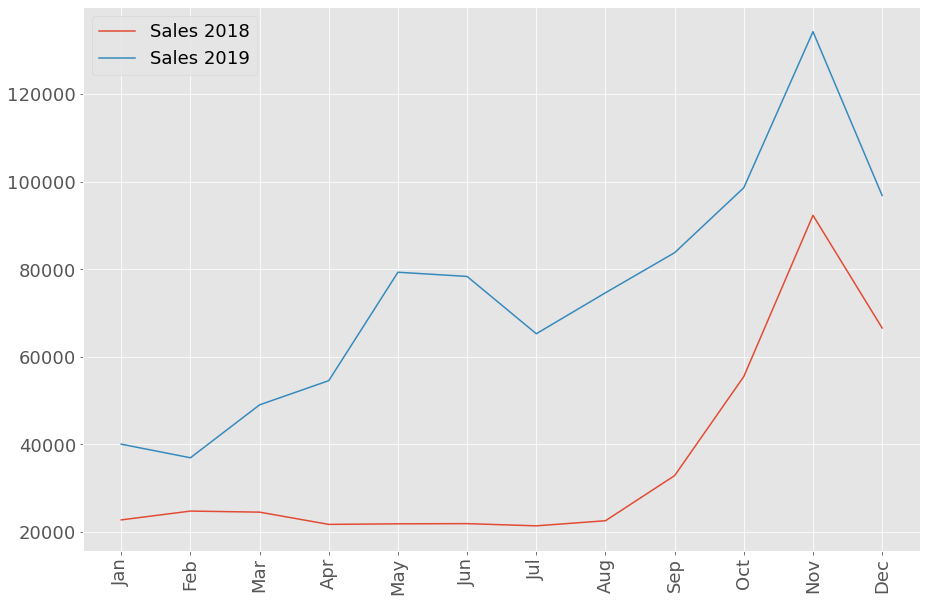

In [31]:
mnth=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# df2['Месяц'] = mnth
# make it a function

fig, ax = plt.subplots(figsize=(15,10))
sales2.groupby('Год').get_group(2018)['Трафик'].plot(ax=ax,label='Sales 2018')
sales2.groupby('Год').get_group(2019)['Трафик'].plot(ax=ax,label='Sales 2019')
plt.legend(loc='best')

ax.set_xticks(np.arange(len(mnth)))  # show them all! - чтобы были все, а не частично

ax.set_xticklabels(mnth)  # set to be the abbv (vs useless #)
plt.xticks(rotation=90)

# Seasonality in 2 year data

In [32]:
# Save for prediction
sales2.to_csv('sales2.csv', encoding='utf-8', sep='\t')
# sales2.to_excel('twoyears.xlsx', encoding='utf-16')

In [33]:
del sales2['Трафик']
del sales2['ЕАПТЕКА']

Create new dataframe for further actions. Index - month.

In [34]:
mnth=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
sales3=pd.DataFrame(index=mnth)
sales3

""
Январь
Февраль
Март
Апрель
Май
Июнь
Июль
Август
Сентябрь
Октябрь


For starters, group data by month then sum received values for 2018 and 2019 in each month. So we can get the table with total sales in each month for all the years we have.

In [42]:
mt=list(sales2['Месяц'].values)[:12]

for i in sales2.columns[2:]:
    col=[]
    for j in mt:
        col.append(sales2.groupby('Месяц').get_group(j)[i].sum())
    sales3[i]=col
    
sales3

,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,Девясил корневища и корни 50г,Дуба кора 75г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь,76.0,25.0,39.0,128.0,181.0,136.0,141.0,171.0,100.0,521.0,...,225.0,281.0,100.0,1078.0,266.0,158.0,353.0,55.0,146.0,125.0
Февраль,101.0,35.0,50.0,174.0,208.0,201.0,101.0,183.0,102.0,400.0,...,237.0,324.0,110.0,783.0,239.0,195.0,344.0,53.0,175.0,103.0
Март,79.0,31.0,52.0,159.0,193.0,129.0,149.0,195.0,95.0,487.0,...,247.0,320.0,107.0,988.0,237.0,160.0,329.0,43.0,146.0,108.0
Апрель,72.0,32.0,34.0,126.0,124.0,120.0,120.0,132.0,82.0,445.0,...,212.0,234.0,84.0,862.0,204.0,161.0,259.0,56.0,108.0,86.0
Май,68.0,29.0,25.0,85.0,99.0,79.0,87.0,140.0,77.0,459.0,...,153.0,171.0,63.0,1681.0,176.0,131.0,207.0,20.0,87.0,104.0
Июнь,53.0,18.0,13.0,81.0,81.0,85.0,102.0,127.0,71.0,415.0,...,156.0,138.0,70.0,936.0,146.0,107.0,213.0,22.0,61.0,106.0
Июль,77.0,34.0,18.0,77.0,70.0,53.0,74.0,137.0,69.0,383.0,...,164.0,127.0,70.0,1199.0,186.0,101.0,214.0,31.0,96.0,97.0
Август,58.0,35.0,28.0,117.0,109.0,72.0,155.0,139.0,64.0,391.0,...,119.0,135.0,94.0,1810.0,157.0,101.0,216.0,53.0,109.0,81.0
Сентябрь,58.0,26.0,34.0,82.0,132.0,117.0,110.0,162.0,59.0,381.0,...,192.0,169.0,91.0,1611.0,210.0,87.0,239.0,56.0,126.0,61.0
Октябрь,66.0,52.0,27.0,126.0,114.0,107.0,162.0,158.0,107.0,355.0,...,192.0,204.0,208.0,761.0,210.0,114.0,302.0,85.0,229.0,67.0


In [43]:
norm2 = preprocessing.MinMaxScaler()
norm2.fit(sales3)

N2 = norm2.transform(sales3)
N2 = pd.DataFrame(N2, index=sales3.index, columns=sales3.columns)
N2.head()

,Аир корневища 75г,Алтей корни 75г,Багульник болотный побеги 50г,Береза почки 50г,Бессмертник песчаный цветки 30г,Боярышник плоды 75г,Брусника листья 50г,Валериана корневища с корнями 50г,Девясил корневища и корни 50г,Дуба кора 75г,...,"Фп Шалфей листья 20х1,5г","Фп Шиповник плоды 20х2,0г",Чабрец трава 50г,Чага (березовый гриб) 50г,Череда трава 50г,Чистотел трава 50г,Шалфей листья 50г,Шиповник плоды низковитаминные 50г,Эвкалипт прутовидный листья 75г,Эрва шерстистая трава 30г
Январь,0.479167,0.205882,0.329114,0.525773,0.804348,0.560811,0.558333,0.647059,0.561644,1.000000,...,0.602273,0.781726,0.255172,0.437788,0.845070,0.657407,0.839080,0.538462,0.505952,1.000000
Февраль,1.000000,0.500000,0.468354,1.000000,1.000000,1.000000,0.225000,0.823529,0.589041,0.271084,...,0.670455,1.000000,0.324138,0.211214,0.654930,1.000000,0.787356,0.507692,0.678571,0.656250
Март,0.541667,0.382353,0.493671,0.845361,0.891304,0.513514,0.625000,1.000000,0.493151,0.795181,...,0.727273,0.979695,0.303448,0.368664,0.640845,0.675926,0.701149,0.353846,0.505952,0.734375
Апрель,0.395833,0.411765,0.265823,0.505155,0.391304,0.452703,0.383333,0.073529,0.315068,0.542169,...,0.528409,0.543147,0.144828,0.271889,0.408451,0.685185,0.298851,0.553846,0.279762,0.390625
Май,0.312500,0.323529,0.151899,0.082474,0.210145,0.175676,0.108333,0.191176,0.246575,0.626506,...,0.193182,0.223350,0.000000,0.900922,0.211268,0.407407,0.000000,0.000000,0.154762,0.671875


In order to get clear surface and diagramm, some manupulations should be done:

In [44]:
# Save correlation table
C2=N2.corr()

In [45]:
# Unstack and sort to get pair with the largest corr. coeff. 
s2 = C2.unstack()
so2=s2.sort_values(kind="quicksort", ascending=False)
so2=so2[so2!=1]
so2

Фп Липа цветки 20x1,5г                                Фп Ромашка цветки 20x1,5г                               0.970165
Фп Ромашка цветки 20x1,5г                             Фп Липа цветки 20x1,5г                                  0.970165
Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г  Фп Зверобой трава 20x1,5г                               0.951354
Фп Зверобой трава 20x1,5г                             Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г    0.951354
Зверобой трава 50г                                    Девясил корневища и корни 50г                           0.950958
                                                                                                                ...   
Чага (березовый гриб) 50г                             Фп Ноготки цветки 20x1,5г                              -0.804642
                                                      Зверобой трава 50г                                     -0.809838
Зверобой трава 50г                              

Put one of these products from that pair in list named names2. Then add the elements according to the following rule: the next element in the sequence is the element that correlates the most with the previous one. Only after these steps a graph should be plotted.

In [46]:
names2=['Фп Липа цветки 20x1,5г']

k =0
for _ in range(0,100):
    names2.append(so2[names2[k]].index[0])
#     print(i[0])
#     print(i)

    del C2[names2[k]]
    C2=C2.drop(index=names2[k])
    
    s2 = C2.unstack()
    so2 = s2.sort_values(kind="quicksort", ascending=False)
    so2=so2[so2!=1]
    k+=1

In [47]:
names2

['Фп Липа цветки 20x1,5г',
 'Фп Ромашка цветки 20x1,5г',
 'Фп Сб. Грудной №4 20x2,0г',
 'Фп Зверобой трава 20x1,5г',
 'Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г',
 'Шалфей листья 50г',
 'Фп Шиповник плоды 20х2,0г',
 'Ромашка цветки вн 50г',
 'Береза почки 50г',
 'Ноготки цветки 50г',
 'Сенна листья 50г',
 'Девясил корневища и корни 50г',
 'Зверобой трава 50г',
 'Фп Ноготки цветки 20x1,5г',
 'Мята перечная листья 50г',
 'Укроп пахучий плоды 50г',
 'Подорожник большой листья 50г',
 'Сб. Грудной №4 50г',
 'Полынь горькая трава 50г',
 'Фп Крапива листья 20x1,5г',
 'Пустырник трава 50г',
 'Фп Мелисса лекарственная трава 20x1,5г',
 'Сб. Элекасол 50г',
 'Фп Сб. Бруснивер 20x2,0г',
 'Фп Череда трава 20х1,5г',
 'Рябина плоды 50г',
 'Фп Шалфей листья 20х1,5г',
 'Череда трава 50г',
 'Крушина кора 50г',
 'Фп Сенна листья 20x1,5г',
 'Багульник болотный побеги 50г',
 'Сб. Фитоседан №2 (Успокоительный сбор №2) 50г',
 'Фп Чабрец трава 20x1,5 г',
 'Аир корневища 75г',
 'Чистотел трава 50г',


In [48]:
twoyear = pd.DataFrame(index=sales3.index)
for i in names2:
    twoyear[i]=sales3[i]

twoyear

,"Фп Липа цветки 20x1,5г","Фп Ромашка цветки 20x1,5г","Фп Сб. Грудной №4 20x2,0г","Фп Зверобой трава 20x1,5г","Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г",Шалфей листья 50г,"Фп Шиповник плоды 20х2,0г",Ромашка цветки вн 50г,Береза почки 50г,Ноготки цветки 50г,...,"Фп Фиалка трехцветная трава 20x1,5г",Сб. Ингафитол №1 (сбор для ингаляций №1) 50г,Чага (березовый гриб) 50г,"Фп Сб. Проктофитол (Противогеморроидальный сбор) 20х2,0г","Фп Бадан корневища 20x1,5г","Фп Крушина кора 20x1,5г","Фп Боярышник плоды 20х3,0г","Фп Аир корневища 20x1,5г",Спорыш трава 50г,Мать-и-мачеха листья 35г
Январь,219.0,3877.0,1049.0,243.0,248.0,353.0,281.0,887.0,128.0,151.0,...,9.0,9.0,1078.0,68.0,10.0,41.0,94.0,23.0,56.0,89.0
Февраль,237.0,3657.0,1231.0,235.0,254.0,344.0,324.0,1010.0,174.0,153.0,...,16.0,7.0,783.0,50.0,11.0,59.0,114.0,24.0,92.0,99.0
Март,241.0,3798.0,1280.0,248.0,263.0,329.0,320.0,876.0,159.0,148.0,...,17.0,9.0,988.0,62.0,6.0,44.0,56.0,30.0,103.0,115.0
Апрель,174.0,3358.0,1044.0,214.0,232.0,259.0,234.0,748.0,126.0,124.0,...,25.0,9.0,862.0,69.0,26.0,28.0,52.0,8.0,114.0,161.0
Май,121.0,2725.0,687.0,145.0,149.0,207.0,171.0,640.0,85.0,107.0,...,14.0,2.0,1681.0,72.0,11.0,39.0,59.0,15.0,68.0,63.0
Июнь,97.0,2187.0,538.0,140.0,125.0,213.0,138.0,454.0,81.0,92.0,...,18.0,9.0,936.0,55.0,14.0,51.0,42.0,25.0,70.0,74.0
Июль,104.0,2159.0,516.0,163.0,179.0,214.0,127.0,568.0,77.0,77.0,...,13.0,6.0,1199.0,50.0,11.0,70.0,70.0,26.0,76.0,73.0
Август,106.0,2480.0,530.0,181.0,172.0,216.0,135.0,667.0,117.0,123.0,...,25.0,42.0,1810.0,87.0,25.0,44.0,33.0,19.0,44.0,78.0
Сентябрь,157.0,3165.0,861.0,194.0,197.0,239.0,169.0,616.0,82.0,102.0,...,10.0,2.0,1611.0,70.0,6.0,48.0,64.0,19.0,85.0,112.0
Октябрь,234.0,3854.0,1121.0,225.0,263.0,302.0,204.0,765.0,126.0,146.0,...,26.0,11.0,761.0,81.0,24.0,45.0,52.0,13.0,98.0,117.0


In [49]:
norm = preprocessing.MinMaxScaler()
norm.fit(twoyear)

ntwoyear= norm.transform(twoyear)
# X = preprocessing.scale(trafficsales)
ntwoyear = pd.DataFrame(ntwoyear, index=twoyear.index, columns=twoyear.columns)
ntwoyear.head()

,"Фп Липа цветки 20x1,5г","Фп Ромашка цветки 20x1,5г","Фп Сб. Грудной №4 20x2,0г","Фп Зверобой трава 20x1,5г","Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г",Шалфей листья 50г,"Фп Шиповник плоды 20х2,0г",Ромашка цветки вн 50г,Береза почки 50г,Ноготки цветки 50г,...,"Фп Фиалка трехцветная трава 20x1,5г",Сб. Ингафитол №1 (сбор для ингаляций №1) 50г,Чага (березовый гриб) 50г,"Фп Сб. Проктофитол (Противогеморроидальный сбор) 20х2,0г","Фп Бадан корневища 20x1,5г","Фп Крушина кора 20x1,5г","Фп Боярышник плоды 20х3,0г","Фп Аир корневища 20x1,5г",Спорыш трава 50г,Мать-и-мачеха листья 35г
Январь,0.659459,0.899476,0.697644,0.944954,0.657754,0.839080,0.781726,0.778777,0.525773,0.973684,...,0.000000,0.214286,0.437788,0.409091,0.055556,0.200000,0.753086,0.681818,0.171429,0.265306
Февраль,0.756757,0.784293,0.935864,0.871560,0.689840,0.787356,1.000000,1.000000,1.000000,1.000000,...,0.411765,0.166667,0.211214,0.000000,0.069444,0.476923,1.000000,0.727273,0.685714,0.367347
Март,0.778378,0.858115,1.000000,0.990826,0.737968,0.701149,0.979695,0.758993,0.845361,0.934211,...,0.470588,0.214286,0.368664,0.272727,0.000000,0.246154,0.283951,1.000000,0.842857,0.530612
Апрель,0.416216,0.627749,0.691099,0.678899,0.572193,0.298851,0.543147,0.528777,0.505155,0.618421,...,0.941176,0.214286,0.271889,0.431818,0.277778,0.000000,0.234568,0.000000,1.000000,1.000000
Май,0.129730,0.296335,0.223822,0.045872,0.128342,0.000000,0.223350,0.334532,0.082474,0.394737,...,0.294118,0.047619,0.900922,0.500000,0.069444,0.169231,0.320988,0.318182,0.342857,0.000000


In [50]:
# Exort for excel plotting. Maplotlib didn't work well here.
ntwoyear.to_excel('normedtwoyears.xlsx', encoding='utf-16')

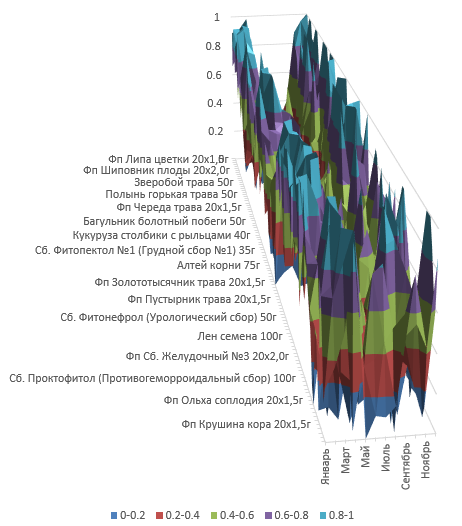

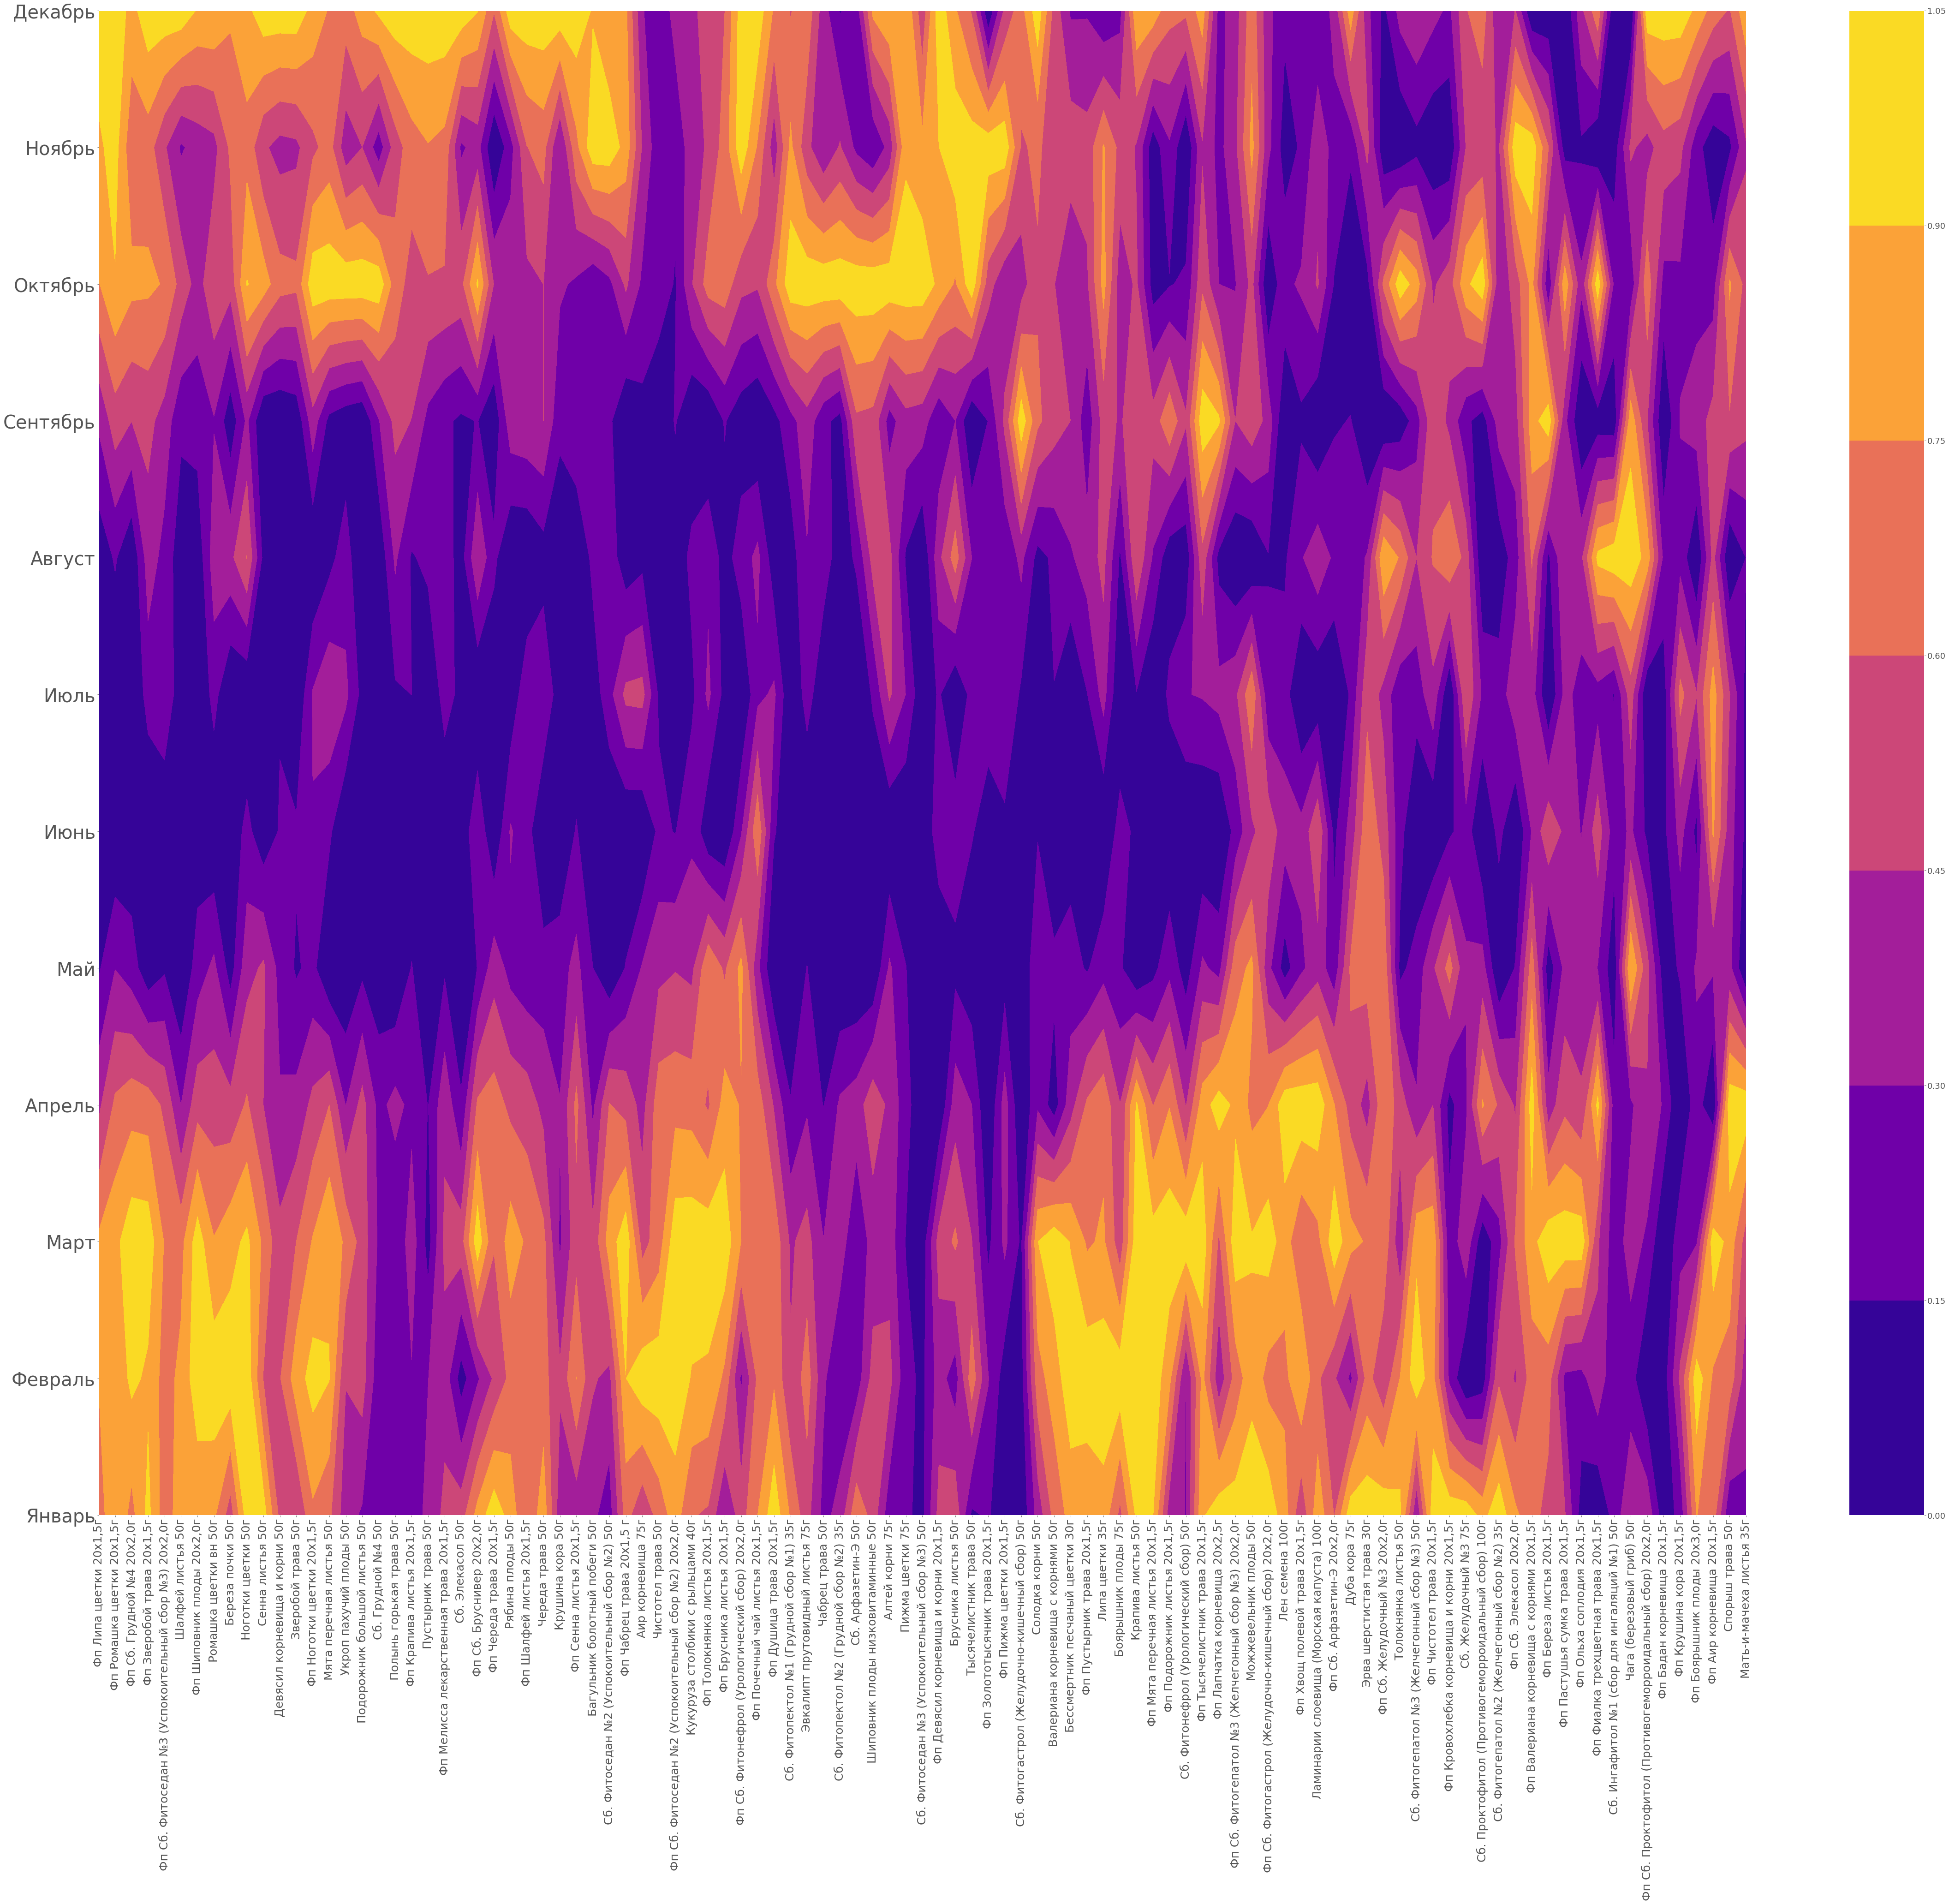

In [51]:
import numpy as np

x = np.arange(len(ntwoyear.columns))
y = np.arange(len(ntwoyear.index))
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(25,15))
cs = ax.contourf(X, Y, ntwoyear.values, cmap='plasma')
plt.colorbar(cs)

ax.set_xticks(np.arange(len(ntwoyear.columns))) 
ax.set_yticks(np.arange(len(ntwoyear.index)))  

ax.set_xticklabels(ntwoyear.columns.values, fontsize=25)  
ax.set_yticklabels(ntwoyear.index.values, fontsize=40)  #
plt.xticks(rotation=90)


fig.set_size_inches(80, 60) # 
plt.savefig("contour.png", dpi=200)

plt.show()

In [52]:
list(twoyear.transpose()[:16].index)

['Фп Липа цветки 20x1,5г',
 'Фп Ромашка цветки 20x1,5г',
 'Фп Сб. Грудной №4 20x2,0г',
 'Фп Зверобой трава 20x1,5г',
 'Фп Сб. Фитоседан №3 (Успокоительный сбор №3) 20х2,0г',
 'Шалфей листья 50г',
 'Фп Шиповник плоды 20х2,0г',
 'Ромашка цветки вн 50г',
 'Береза почки 50г',
 'Ноготки цветки 50г',
 'Сенна листья 50г',
 'Девясил корневища и корни 50г',
 'Зверобой трава 50г',
 'Фп Ноготки цветки 20x1,5г',
 'Мята перечная листья 50г',
 'Укроп пахучий плоды 50г']

In [ ]:
twoyear2=twoyear.copy()

In [ ]:
for i in list(twoyear2.columns[:3]):
    del twoyear2[i]

In [ ]:
seasonality = pd.DataFrame()

SemptApril=list(twoyear.transpose()[:16].index)

In [54]:
# import statsmodels.api as sm
# # multiplicative
# matplotlib.rcParams.update({'font.size': 12})

# res = sm.tsa.seasonal_decompose(sales2['Спорыш трава 50г'],period=12,model="additive")

# fig = res.plot()
# # fig.savefig('Seasonal_Decompose18.png', dpi=150)
